# ORIE 5530 Midterm Project
#### Team Member: Dahong Zhang, Zimu Li, Gareth Sun
#### NetID: zs389, zl898, dz285

## Warm Up Question

#### Data Load and Pre-process

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [6]:
df = pd.read_csv("202307-citibike-tripdata.csv")
df.head()

/var/folders/ck/b09qsxz518x4rlt33mrt531c0000gn/T/ipykernel_1070/2021628630.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("202307-citibike-tripdata.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BC78328130CD8A16,classic_bike,2023-07-16 20:42:57,2023-07-16 20:45:13,St. Nicholas Ave & W 126 St,7756.10,Adam Clayton Powell Blvd & W 126 St,7738.04,40.811432,-73.951878,40.809495,-73.947765,member
1,71A4DFA231ADAEA2,classic_bike,2023-07-29 12:22:21,2023-07-29 12:26:54,Adam Clayton Powell Blvd & W 118 St,7670.09,Adam Clayton Powell Blvd & W 126 St,7738.04,40.804372,-73.951475,40.809495,-73.947765,member
2,B64451D0D9F52134,classic_bike,2023-07-30 18:30:18,2023-07-30 18:35:42,St. Nicholas Ave & W 126 St,7756.10,Lenox Ave & W 130 St,7753.13,40.811378,-73.951827,40.810792,-73.943068,member
3,EEECB3E0E05EB0DB,classic_bike,2023-07-04 19:59:20,2023-07-04 20:02:03,St. Nicholas Ave & W 126 St,7756.10,Adam Clayton Powell Blvd & W 126 St,7738.04,40.811432,-73.951878,40.809495,-73.947765,member
4,76B706DF4FC180DC,classic_bike,2023-07-03 19:33:36,2023-07-03 19:43:59,St. Nicholas Ave & W 126 St,7756.10,Pleasant Ave & E 116 St,7450.05,40.811543,-73.951813,40.794988,-73.933335,member


In [7]:
# Calculate the Time Duration
df['starttime'] = pd.to_datetime(df['started_at'])
df['stoptime'] = pd.to_datetime(df['ended_at'])
df['time_duration'] = df['stoptime'] - df['starttime']

# Data Pre-process
df = df[df['time_duration'] >= pd.Timedelta(hours=0)]
df = df[df['time_duration'] <= pd.Timedelta(hours=3)]
print(df.size)

60268400


### 1. Compute the duration of each ride in minutes and plot the histogram of ride durations.

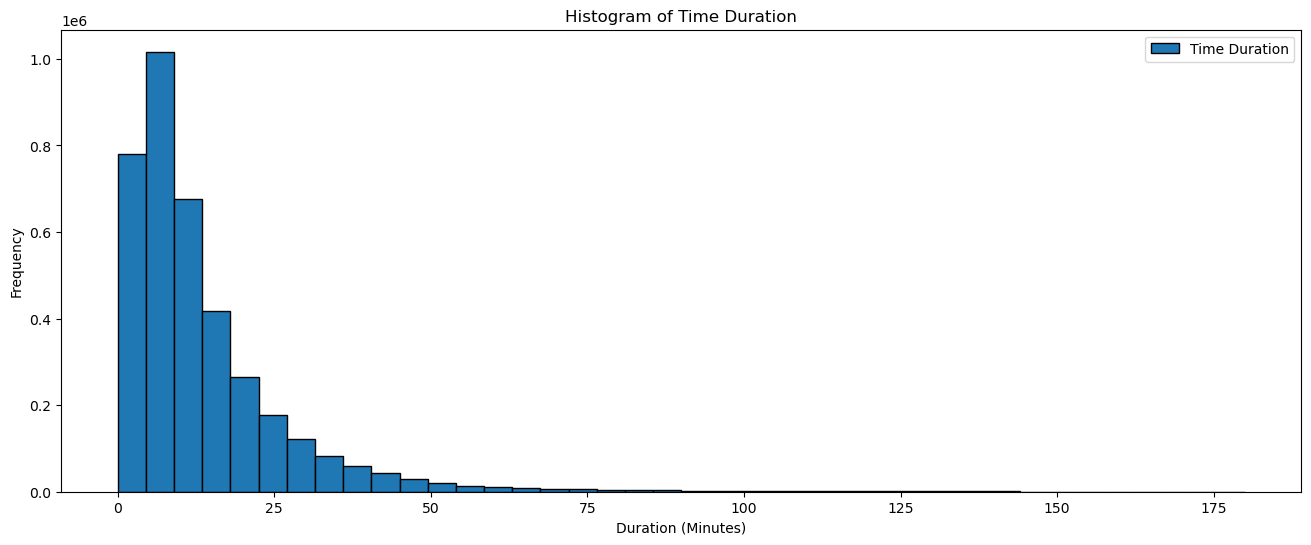

In [8]:
time_plot = pd.to_timedelta(df['time_duration'])
time_plot = df['time_duration'].dt.total_seconds() / 60

plt.figure(figsize=(16,6))
plt.hist(time_plot, bins=40, edgecolor='black', label='Time Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Duration')
plt.legend()
plt.show()

### 2. Expected Duration and Variance

#### Expected ride duration 

In [9]:
avg_time = df['time_duration'].mean()
avg_time_in_min = avg_time.total_seconds() / 60
avg_time_in_min = np.round(avg_time_in_min, 2)
print(f"Expected ride duration is {avg_time_in_min} mins.")

Expected ride duration is 13.65 mins.


#### Empirical variance of ride duration

In [10]:
df['time_duration_seconds'] = df['time_duration'].dt.total_seconds() / 60
variance = df['time_duration_seconds'].var()
variance = np.round(variance, 2)
print(f"Variance of minutes is {variance}.")

Variance of minutes is 203.91.


#### Rider Duration Longer than 20 Mins

In [11]:
long_riders = df[ df['time_duration'] >=  pd.Timedelta(minutes=20) ]
probability = len(long_riders)/ len(df) 
print(f"The probability that a ride duration is greater than 20 min is {probability * 100}%")

The probability that a ride duration is greater than 20 min is 19.775749812505392%


### 3. Probability of Ride Duration Greater than 20 Mins

#### Probability of Member Longer than 20 Mins 

In [12]:
member_riders = df[ df['member_casual'] == 'member' ]
long_member = member_riders[member_riders['time_duration'] >= pd.Timedelta(minutes=20)]
probability = len(long_member)/ len(member_riders) 
print(f"The probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member is {probability * 100}%")

The probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member is 15.564672725015486%


### 4.  The probability That Longer Than 25 Mins Ride Belongs to a CitiBike Member

In [13]:
longer_than_25_min = df[df['time_duration'] >= pd.Timedelta(minutes=25)]
longer_than_25_min_member = longer_than_25_min[longer_than_25_min['member_casual'] == 'member']
probability_2 = len(longer_than_25_min_member) / len(longer_than_25_min)
print(f"The probability that longer than 25 min ride belongs to a CitiBike member is {probability_2 * 100}%")

The probability that longer than 25 min ride belongs to a CitiBike member is 57.876337476304165%


### 5. Expected Duration of Bike

In [14]:
electric_bike = df[df['rideable_type'] == 'electric_bike']
avg_electric_time = electric_bike['time_duration'].mean()
avg_electric_time_in_min = avg_electric_time.total_seconds() / 60
print(f"Expected ride duration of electric bike is {avg_electric_time_in_min} mins.")

Expected ride duration of electric bike is 12.275573333333334 mins.


In [15]:
classic_bike = df[df['rideable_type'] == 'classic_bike']
avg_classic_time = classic_bike['time_duration'].mean()
avg_classic_time_in_min = avg_classic_time.total_seconds() / 60
print(f"Expected ride duration of classic bike is {avg_classic_time_in_min} mins.")

Expected ride duration of classic bike is 13.727032833333334 mins.


### 6. Suppose that the duration of some ride is less than 10min. 
#### What is the probability that this ride uses an electric bike? 
#### What is the probability that this ride uses a classic bike?

In [16]:
less_10_min_ride = df[df['time_duration'] <= pd.Timedelta(minutes=10)]
less_10_min_electric_ride = less_10_min_ride[less_10_min_ride['rideable_type'] == 'electric_bike']
less_10_min_classic_ride = less_10_min_ride[less_10_min_ride['rideable_type'] == 'classic_bike']

probability_classic = len(less_10_min_classic_ride) / len(less_10_min_ride)
probability_electric = len(less_10_min_electric_ride) / len(less_10_min_ride)

print(f"The probability that this ride uses a classic bike less than 10min {probability_classic}.")
print(f"The probability that this ride uses a electric bike less than 10min {probability_electric}.")

The probability that this ride uses a classic bike less than 10min 0.9101874475812783.
The probability that this ride uses a electric bike less than 10min 0.08919753974733986.


The results indicate a strong preference for using classic bikes for shorter rides. For short distance riders, they would prefer to use classic bikes. This may be due to the availability of classic bikes and the fact that the charge for classic bikes is lower than for electric bikes. So, for those who travel short distances, they would not bother to find electric bikes. Electric bikes, on the other hand, are primarily used for long distance travel and take a longer time duration.

However, the expectation that the time duration of classic bike use is shorter than that of electric bikes may be because a small number of classic bikes are left unlocked and used for a long time.

## Project Questions

### 1. Select the busiest Stations

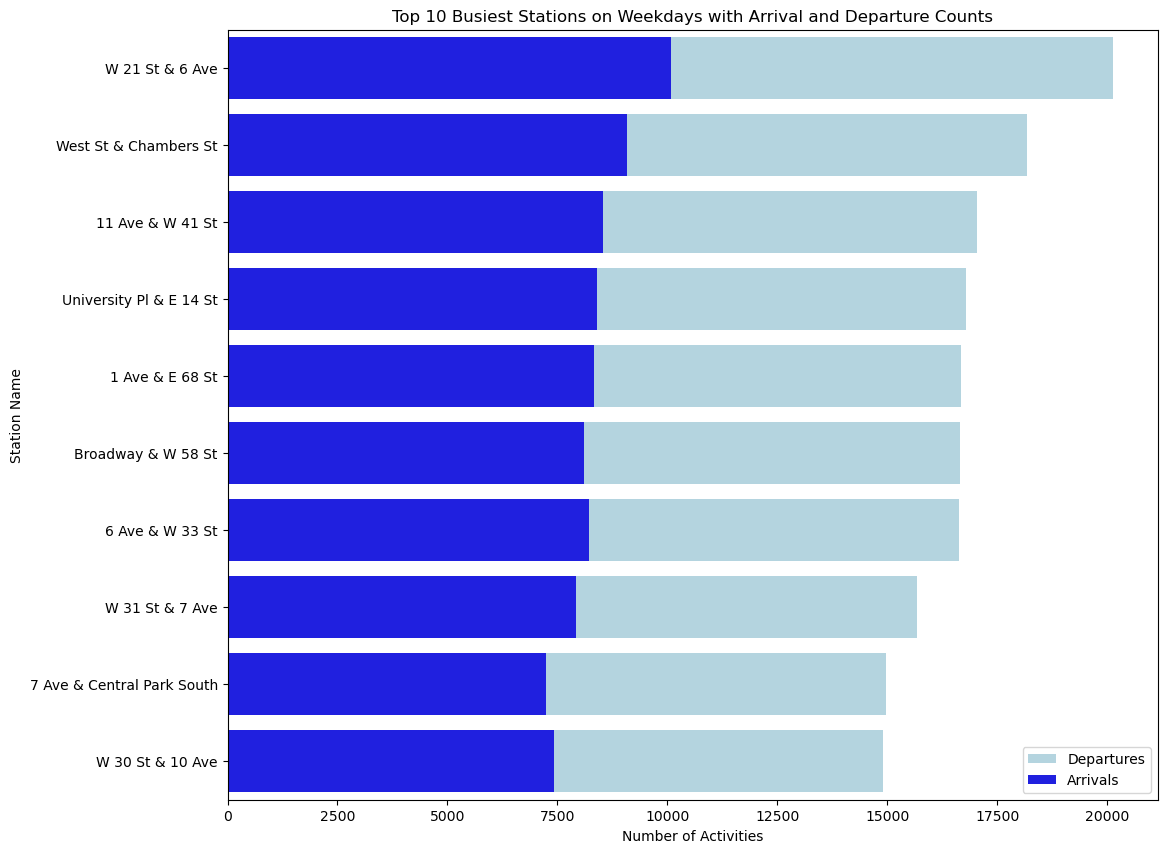

In [17]:
# Convert into Datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Select Weekdays
df['day_of_week'] = df['started_at'].dt.dayofweek
df_weekdays = df[df['day_of_week'].isin(range(5))]

# Calculate the usage
start_station_counts = df_weekdays['start_station_name'].value_counts()
end_station_counts = df_weekdays['end_station_name'].value_counts()
total_station_activity = start_station_counts.add(end_station_counts, fill_value=0)
top_stations = total_station_activity.sort_values(ascending=False).head(10)
top_start_counts = start_station_counts.reindex(top_stations.index, fill_value=0)
top_end_counts = end_station_counts.reindex(top_stations.index, fill_value=0)

# Plot the figure
plt.figure(figsize=(12,10))
sns.barplot(x=top_stations.values, y=top_stations.index, color='lightblue', label='Departures')
sns.barplot(x=top_end_counts.values, y=top_end_counts.index, color='blue', label='Arrivals')
plt.xlabel('Number of Activities')
plt.ylabel('Station Name')
plt.title('Top 10 Busiest Stations on Weekdays with Arrival and Departure Counts')
plt.legend()
plt.show()


In [18]:
top_three_stations = total_station_activity.nlargest(3).index
top_stations_data = df_weekdays[df_weekdays['start_station_name'].isin(top_three_stations) | df_weekdays['end_station_name'].isin(top_three_stations)]
csv_file_path = 'top_three_stations_data.csv'
top_stations_data.to_csv(csv_file_path, index=False)

In [19]:
print(top_three_stations)

Index(['W 21 St & 6 Ave', 'West St & Chambers St', '11 Ave & W 41 St'], dtype='object')


### 2. Calculate the change of bikes

In [20]:
file_path = 'top_three_stations_data.csv'
df = pd.read_csv(file_path)
target_station = ['W 21 St & 6 Ave', 'West St & Chambers St', '11 Ave & W 41 St']
# Convert str to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create a filter for time
morning_time= (df['started_at'].dt.hour >= 6) & (df['started_at'].dt.hour < 11)
afternoon_time = (df['started_at'].dt.hour >= 16) & (df['started_at'].dt.hour < 22)

# Filter Out required data
df = df[morning_time | afternoon_time]

df['start_time_interval'] = df['started_at'].dt.floor('10T')
df['end_time_interval'] = df['ended_at'].dt.floor('10T')

In [21]:
#  Split into morning and afternoon parts
morning_df = df[morning_time]
afternoon_df = df[afternoon_time]

station_w21St6ave_morning = morning_df[(morning_df['start_station_name'] == 'W 21 St & 6 Ave') | (morning_df['end_station_name'] == 'W 21 St & 6 Ave')]
station_w21St6ave_afternoon = afternoon_df[(afternoon_df['start_station_name'] == 'W 21 St & 6 Ave') | (afternoon_df['end_station_name'] == 'W 21 St & 6 Ave')]

# West St & Chambers St - Morning and Afternoon
station_westStChambersSt_morning = morning_df[(morning_df['start_station_name'] == 'West St & Chambers St') | (morning_df['end_station_name'] == 'West St & Chambers St')]
station_westStChambersSt_afternoon = afternoon_df[(afternoon_df['start_station_name'] == 'West St & Chambers St') | (afternoon_df['end_station_name'] == 'West St & Chambers St')]

# 11 Ave & W 41 St - Morning and Afternoon
station_11aveW41St_morning = morning_df[(morning_df['start_station_name'] == '11 Ave & W 41 St') | (morning_df['end_station_name'] == '11 Ave & W 41 St')]
station_11aveW41St_afternoon = afternoon_df[(afternoon_df['start_station_name'] == '11 Ave & W 41 St') | (afternoon_df['end_station_name'] == '11 Ave & W 41 St')]

/var/folders/ck/b09qsxz518x4rlt33mrt531c0000gn/T/ipykernel_1070/602006012.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  morning_df = df[morning_time]
/var/folders/ck/b09qsxz518x4rlt33mrt531c0000gn/T/ipykernel_1070/602006012.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  afternoon_df = df[afternoon_time]


In [22]:
# West 21 St & 6 Ave - Morning
out_count_per_5_min_morning = station_w21St6ave_morning[station_w21St6ave_morning['start_station_name'] == 'W 21 St & 6 Ave']['start_time_interval'].value_counts()
in_count_per_5_min_morning = station_w21St6ave_morning[station_w21St6ave_morning['end_station_name'] == 'W 21 St & 6 Ave']['end_time_interval'].value_counts()

station_w21St6ave_count_morning = pd.concat([in_count_per_5_min_morning, out_count_per_5_min_morning], axis=1).rename(columns={'end_time_interval': 'in_count', 'start_time_interval': 'out_count'})
station_w21St6ave_count_morning.fillna(0, inplace=True)
station_w21St6ave_count_morning['final_count'] = station_w21St6ave_count_morning['in_count'] - station_w21St6ave_count_morning['out_count']
station_w21St6ave_count_morning['final_count'] = station_w21St6ave_count_morning['final_count'].astype(int)

# West 21 St & 6 Ave - Afternoon
out_count_per_5_min_afternoon = station_w21St6ave_afternoon[station_w21St6ave_afternoon['start_station_name'] == 'W 21 St & 6 Ave']['start_time_interval'].value_counts()
in_count_per_5_min_afternoon = station_w21St6ave_afternoon[station_w21St6ave_afternoon['end_station_name'] == 'W 21 St & 6 Ave']['end_time_interval'].value_counts()

station_w21St6ave_count_afternoon = pd.concat([in_count_per_5_min_afternoon, out_count_per_5_min_afternoon], axis=1).rename(columns={'end_time_interval': 'in_count', 'start_time_interval': 'out_count'})
station_w21St6ave_count_afternoon.fillna(0, inplace=True)
station_w21St6ave_count_afternoon['final_count'] = station_w21St6ave_count_afternoon['in_count'] - station_w21St6ave_count_afternoon['out_count']
station_w21St6ave_count_afternoon['final_count'] = station_w21St6ave_count_afternoon['final_count'].astype(int)


# West St & Chambers St - Morning
out_count_westStChambersSt_morning = station_westStChambersSt_morning[station_westStChambersSt_morning['start_station_name'] == 'West St & Chambers St']['start_time_interval'].value_counts()
in_count_westStChambersSt_morning = station_westStChambersSt_morning[station_westStChambersSt_morning['end_station_name'] == 'West St & Chambers St']['end_time_interval'].value_counts()

station_westStChambersSt_count_morning = pd.concat([in_count_westStChambersSt_morning, out_count_westStChambersSt_morning], axis=1).rename(columns={'end_time_interval': 'in_count', 'start_time_interval': 'out_count'})
station_westStChambersSt_count_morning.fillna(0, inplace=True)
station_westStChambersSt_count_morning['final_count'] = station_westStChambersSt_count_morning['in_count'] - station_westStChambersSt_count_morning['out_count']
station_westStChambersSt_count_morning['final_count'] = station_westStChambersSt_count_morning['final_count'].astype(int)

# West St & Chambers St - Afternoon
out_count_westStChambersSt_afternoon = station_westStChambersSt_afternoon[station_westStChambersSt_afternoon['start_station_name'] == 'West St & Chambers St']['start_time_interval'].value_counts()
in_count_westStChambersSt_afternoon = station_westStChambersSt_afternoon[station_westStChambersSt_afternoon['end_station_name'] == 'West St & Chambers St']['end_time_interval'].value_counts()

station_westStChambersSt_count_afternoon = pd.concat([in_count_westStChambersSt_afternoon, out_count_westStChambersSt_afternoon], axis=1).rename(columns={'end_time_interval': 'in_count', 'start_time_interval': 'out_count'})
station_westStChambersSt_count_afternoon.fillna(0, inplace=True)
station_westStChambersSt_count_afternoon['final_count'] = station_westStChambersSt_count_afternoon['in_count'] - station_westStChambersSt_count_afternoon['out_count']
station_westStChambersSt_count_afternoon['final_count'] = station_westStChambersSt_count_afternoon['final_count'].astype(int)

# 11 Ave & W 41 St - Morning
out_count_11aveW41St_morning = station_11aveW41St_morning[station_11aveW41St_morning['start_station_name'] == '11 Ave & W 41 St']['start_time_interval'].value_counts()
in_count_11aveW41St_morning = station_11aveW41St_morning[station_11aveW41St_morning['end_station_name'] == '11 Ave & W 41 St']['end_time_interval'].value_counts()

station_11aveW41St_count_morning = pd.concat([in_count_11aveW41St_morning, out_count_11aveW41St_morning], axis=1).rename(columns={'end_time_interval': 'in_count', 'start_time_interval': 'out_count'})
station_11aveW41St_count_morning.fillna(0, inplace=True)
station_11aveW41St_count_morning['final_count'] = station_11aveW41St_count_morning['in_count'] - station_11aveW41St_count_morning['out_count']
station_11aveW41St_count_morning['final_count'] = station_11aveW41St_count_morning['final_count'].astype(int)

# 11 Ave & W 41 St - Afternoon
out_count_11aveW41St_afternoon = station_11aveW41St_afternoon[station_11aveW41St_afternoon['start_station_name'] == '11 Ave & W 41 St']['start_time_interval'].value_counts()
in_count_11aveW41St_afternoon = station_11aveW41St_afternoon[station_11aveW41St_afternoon['end_station_name'] == '11 Ave & W 41 St']['end_time_interval'].value_counts()

station_11aveW41St_count_afternoon = pd.concat([in_count_11aveW41St_afternoon, out_count_11aveW41St_afternoon], axis=1).rename(columns={'end_time_interval': 'in_count', 'start_time_interval': 'out_count'})
station_11aveW41St_count_afternoon.fillna(0, inplace=True)
station_11aveW41St_count_afternoon['final_count'] = station_11aveW41St_count_afternoon['in_count'] - station_11aveW41St_count_afternoon['out_count']
station_11aveW41St_count_afternoon['final_count'] = station_11aveW41St_count_afternoon['final_count'].astype(int)


In [23]:
station_w21St6ave_count_morning

,in_count,out_count,final_count
2023-07-03 06:20:00,1.0,0.0,1
2023-07-03 06:30:00,0.0,1.0,-1
2023-07-03 06:40:00,2.0,1.0,1
2023-07-03 06:50:00,2.0,0.0,2
2023-07-03 07:30:00,2.0,1.0,1
...,...,...,...
2023-07-31 10:40:00,5.0,5.0,0
2023-07-31 10:50:00,4.0,3.0,1
2023-07-31 11:00:00,6.0,0.0,6
2023-07-31 11:10:00,1.0,0.0,1


In [24]:
station_w21St6ave_dict_morning = dict(sorted(Counter(station_w21St6ave_count_morning['final_count']).items()))
station_w21St6ave_dict_afternoon = dict(sorted(Counter(station_w21St6ave_count_afternoon['final_count']).items()))

station_westStChambersSt_dict_morning = dict(sorted(Counter(station_westStChambersSt_count_morning['final_count']).items()))
station_westStChambersSt_dict_afternoon = dict(sorted(Counter(station_westStChambersSt_count_afternoon['final_count']).items()))

station_11aveW41St_dict_morning = dict(sorted(Counter(station_11aveW41St_count_morning['final_count']).items()))
station_11aveW41St_dict_afternoon = dict(sorted(Counter(station_11aveW41St_count_afternoon['final_count']).items()))

In [25]:
station_w21St6ave_dict_morning

{-11: 1,
 -7: 2,
 -6: 3,
 -5: 7,
 -4: 11,
 -3: 21,
 -2: 49,
 -1: 79,
 0: 83,
 1: 118,
 2: 94,
 3: 57,
 4: 43,
 5: 25,
 6: 27,
 7: 11,
 8: 4,
 9: 7,
 11: 2}

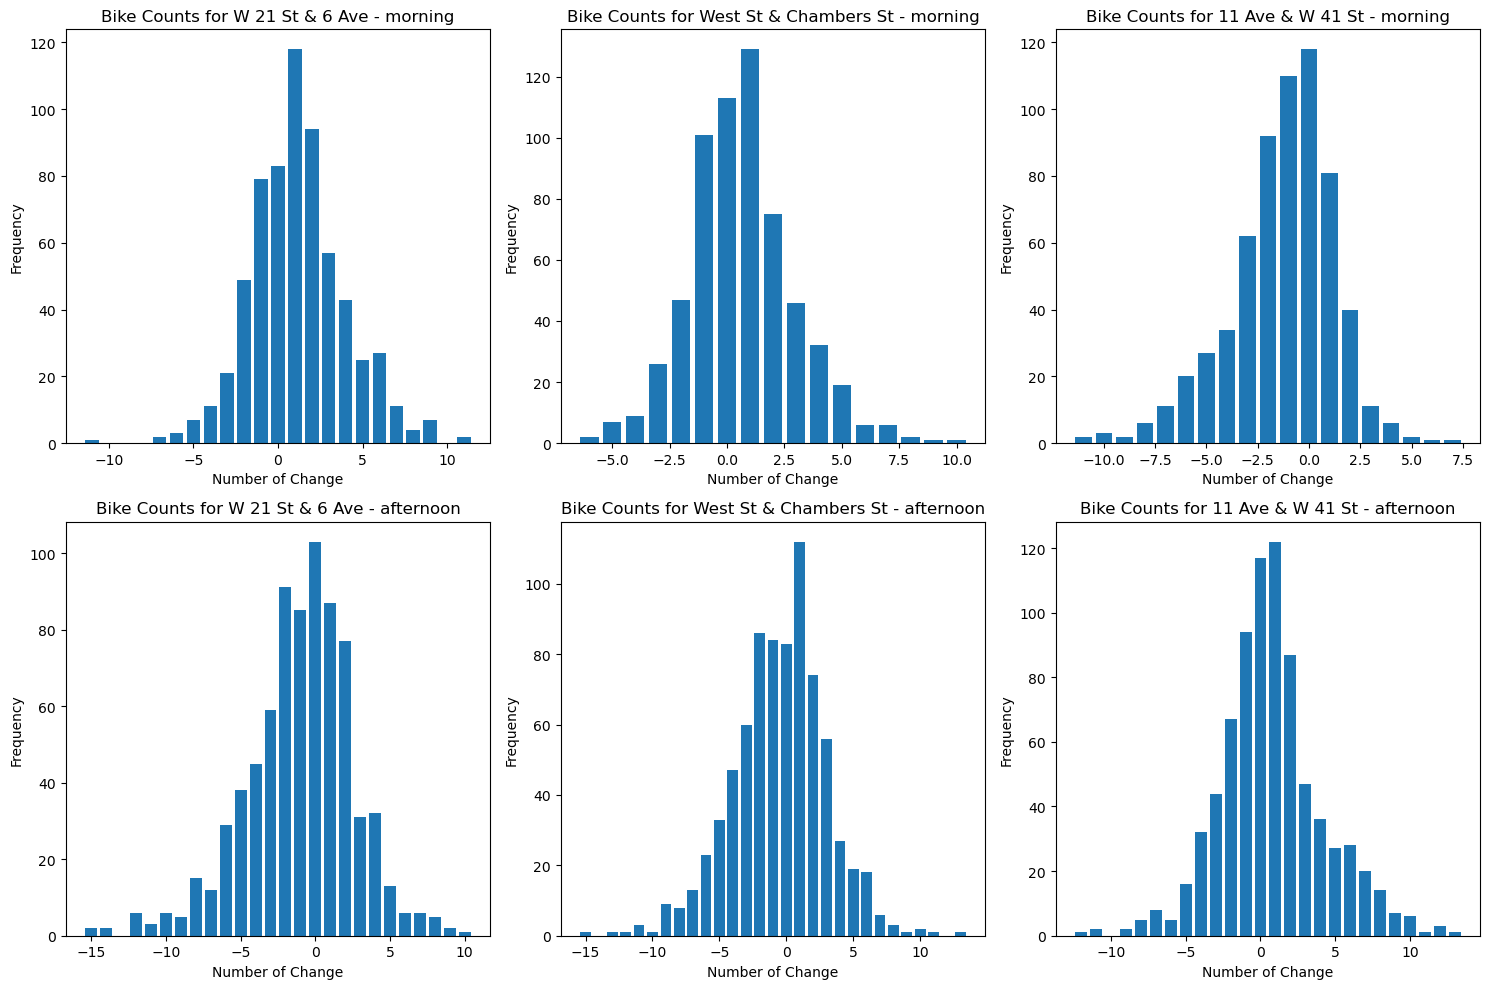

In [26]:
def plot_bar(dic, location, time, ax=None):
    if ax is None:
        plt.bar(dic.keys(), dic.values())
        plt.title(f"Bike Counts for {location} - {time}")
        plt.xlabel("Number of Change")
        plt.ylabel("Frequency")
        plt.show()
    else:
        ax.bar(dic.keys(), dic.values())
        ax.set_title(f"Bike Counts for {location} - {time}")
        ax.set_xlabel("Number of Change")
        ax.set_ylabel("Frequency")

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# West 21 St & 6 Ave - Morning
plot_bar(station_w21St6ave_dict_morning, 'W 21 St & 6 Ave', 'morning', ax=axes[0, 0])

# West 21 St & 6 Ave - Afternoon
plot_bar(station_w21St6ave_dict_afternoon, 'W 21 St & 6 Ave', 'afternoon', ax=axes[1, 0])

# West St & Chambers St - Morning
plot_bar(station_westStChambersSt_dict_morning, 'West St & Chambers St', 'morning', ax=axes[0, 1])

# West St & Chambers St - Afternoon
plot_bar(station_westStChambersSt_dict_afternoon, 'West St & Chambers St', 'afternoon', ax=axes[1, 1])

# 11 Ave & W 41 St - Morning
plot_bar(station_11aveW41St_dict_morning, '11 Ave & W 41 St', 'morning', ax=axes[0, 2])

# 11 Ave & W 41 St - Afternoon
plot_bar(station_11aveW41St_dict_afternoon, '11 Ave & W 41 St', 'afternoon', ax=axes[1, 2])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
def create_transition_matrix(docks, bike_change_dict):
    changes = list(bike_change_dict.keys())
    frequency = list(bike_change_dict.values())
    matrix = np.zeros((docks + 1, docks + 1))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (j - i) in changes:
                matrix[i][j] = bike_change_dict[j - i]
        matrix[i] = matrix[i]/sum(matrix[i])
    return matrix

def verify_row_sum_to_one(matrix):
    row_sums = np.sum(matrix, axis=1)
    return np.allclose(row_sums, 1)

In [28]:
w21St6ave_dock = 52
westStChambersSt_dock = 101
station_11aveW41St_dock = 46

w21St6ave_morning = create_transition_matrix(w21St6ave_dock, station_w21St6ave_dict_morning)
w21St6ave_afternoon = create_transition_matrix(w21St6ave_dock, station_w21St6ave_dict_afternoon)

westStChambersSt_morning = create_transition_matrix(westStChambersSt_dock, station_westStChambersSt_dict_morning)
westStChambersSt_afternoon = create_transition_matrix(westStChambersSt_dock, station_westStChambersSt_dict_afternoon)

station_11aveW41St_morning  = create_transition_matrix(station_11aveW41St_dock, station_11aveW41St_dict_morning)
station_11aveW41St_afternoon = create_transition_matrix(station_11aveW41St_dock, station_11aveW41St_dict_afternoon)


In [29]:
print(station_11aveW41St_afternoon)

[[0.22674419 0.23643411 0.16860465 ... 0.         0.         0.        ]
 [0.15409836 0.19180328 0.2        ... 0.         0.         0.        ]
 [0.09896603 0.13884786 0.17282127 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.19435216 0.20265781 0.14451827]
 [0.         0.         0.         ... 0.18252427 0.22718447 0.2368932 ]
 [0.         0.         0.         ... 0.17048346 0.23918575 0.29770992]]


In [30]:
import numpy as np
np.set_printoptions(threshold=np.inf)

# Define a list of transition matrices for different stations and times
transition_matrices = [w21St6ave_morning, w21St6ave_afternoon,
                       westStChambersSt_morning, westStChambersSt_afternoon,
                       station_11aveW41St_morning, station_11aveW41St_afternoon]

print(w21St6ave_morning)

[[0.17622081 0.25053079 0.19957537 0.12101911 0.09129512 0.05307856
  0.05732484 0.02335456 0.00849257 0.014862   0.         0.00424628
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.14363636 0.15090909 0.21454545 0.17090909 0.10363636 0.07818182
  0.04545455 0.04909091 0.02       0.00727273 0.01272727 0.
  0.00363636 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.   

In [31]:
# Verify if the row sums equal to one for each matrix
print(verify_row_sum_to_one(w21St6ave_morning))
print(verify_row_sum_to_one(w21St6ave_afternoon))

print(verify_row_sum_to_one(westStChambersSt_morning))
print(verify_row_sum_to_one(westStChambersSt_afternoon))

print(verify_row_sum_to_one(station_11aveW41St_morning))
print(verify_row_sum_to_one(station_11aveW41St_afternoon))


True
True
True
True
True
True


In [32]:
def calculate_stationary_distribution(transition_matrix):
    # Transpose the transition matrix to find left eigenvectors
    transposed_matrix = np.transpose(transition_matrix)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(transposed_matrix)

    # Find the index corresponding to the eigenvalue 1
    index = np.where(np.isclose(eigenvalues, 1))[0][0]

    # Extract the corresponding eigenvector
    stationary_distribution = np.real(eigenvectors[:, index])

    # Normalize the stationary distribution to sum to 1
    stationary_distribution /= np.sum(stationary_distribution)

    return stationary_distribution

w21St6ave_morning_distribution = calculate_stationary_distribution(w21St6ave_morning)
w21St6ave_afternoon_distribution = calculate_stationary_distribution(w21St6ave_afternoon)
westStChambersSt_morning_distribution =  calculate_stationary_distribution(westStChambersSt_morning)
westStChambersSt_afternoon_distribution = calculate_stationary_distribution(westStChambersSt_afternoon) 
station_11aveW41St_morning_distribution  = calculate_stationary_distribution(station_11aveW41St_morning)
station_11aveW41St_afternoon_distribution = calculate_stationary_distribution(station_11aveW41St_afternoon)

In [33]:
print(w21St6ave_morning)

[[0.17622081 0.25053079 0.19957537 0.12101911 0.09129512 0.05307856
  0.05732484 0.02335456 0.00849257 0.014862   0.         0.00424628
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.14363636 0.15090909 0.21454545 0.17090909 0.10363636 0.07818182
  0.04545455 0.04909091 0.02       0.00727273 0.01272727 0.
  0.00363636 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.   

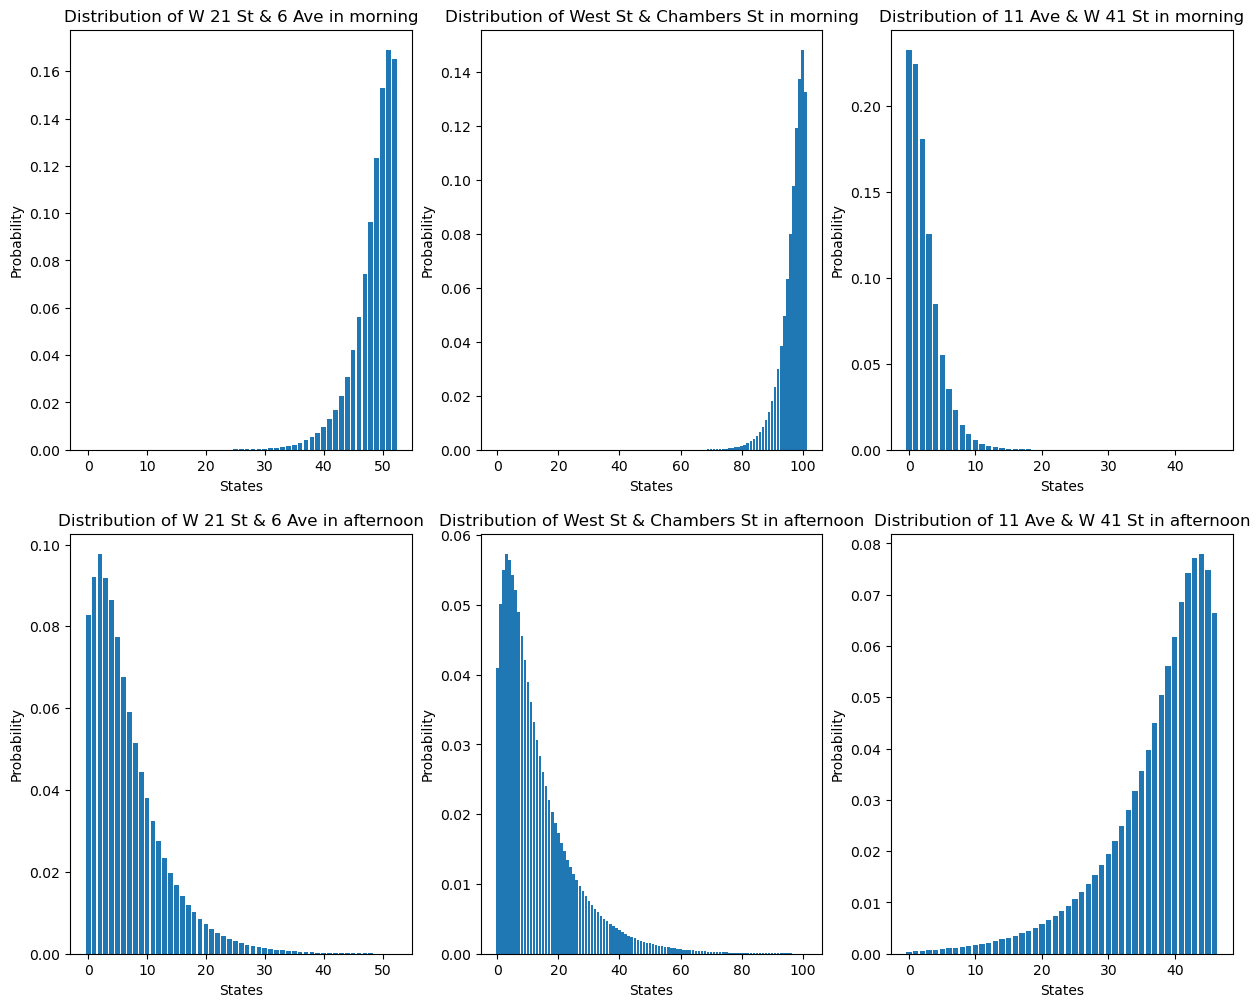

In [47]:
def plot_dis(num_of_dock, distribution, site, time, ax):
    num = range(num_of_dock + 1)
    ax.bar(num, distribution, label='Frequency')
    ax.set_title(f'Distribution of {site} in {time}')
    ax.set_xlabel("States")
    ax.set_ylabel("Probability")

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))


plot_dis(w21St6ave_dock, w21St6ave_morning_distribution, "W 21 St & 6 Ave", "morning", ax=axes[0, 0])
plot_dis(westStChambersSt_dock, westStChambersSt_morning_distribution, 'West St & Chambers St', "morning", ax=axes[0, 1])
plot_dis(station_11aveW41St_dock, station_11aveW41St_morning_distribution, '11 Ave & W 41 St', "morning", ax=axes[0, 2])
plot_dis(w21St6ave_dock, w21St6ave_afternoon_distribution,  "W 21 St & 6 Ave", "afternoon", ax=axes[1, 0])
plot_dis(westStChambersSt_dock, westStChambersSt_afternoon_distribution, 'West St & Chambers St', "afternoon", ax=axes[1, 1])
plot_dis(station_11aveW41St_dock, station_11aveW41St_afternoon_distribution, '11 Ave & W 41 St', "afternoon", ax=axes[1, 2])

In [35]:
def exp_cal(stationary_distribution, dock):
    expectation = 0
    for num in range(dock + 1):
        expectation += num * stationary_distribution[num]
    return expectation


In [36]:
print(f"W 21 St & 6 Ave (Morning): {round(exp_cal(w21St6ave_morning_distribution, w21St6ave_dock))}")
print(f"W 21 St & 6 Ave (Afternoon): {round(exp_cal(w21St6ave_afternoon_distribution, w21St6ave_dock))}")

print(f"West St & Chambers St (Morning): {round(exp_cal(westStChambersSt_morning_distribution, westStChambersSt_dock))}")
print(f"West St & Chambers St (Afternoon): {round(exp_cal(westStChambersSt_afternoon_distribution, westStChambersSt_dock))}")

print(f"11 Ave & W 41 St (Morning): {round(exp_cal(station_11aveW41St_morning_distribution, station_11aveW41St_dock))}")
print(f"11 Ave & W 41 St (Afternoon): {round(exp_cal(station_11aveW41St_afternoon_distribution, station_11aveW41St_dock))}")

W 21 St & 6 Ave (Morning): 48
W 21 St & 6 Ave (Afternoon): 7
West St & Chambers St (Morning): 97
West St & Chambers St (Afternoon): 13
11 Ave & W 41 St (Morning): 2
11 Ave & W 41 St (Afternoon): 37


In [38]:
w21St6ave_dock = 52
westStChambersSt_dock = 101
station_11aveW41St_dock = 46

EM_w21St6ave_dock = round(exp_cal(w21St6ave_morning_distribution, w21St6ave_dock))
EA_w21St6ave_dock = round(exp_cal(w21St6ave_afternoon_distribution, w21St6ave_dock))
EM_westStChambersSt_dock = round(exp_cal(westStChambersSt_morning_distribution, westStChambersSt_dock))
EA_westStChambersSt_dock = round(exp_cal(westStChambersSt_afternoon_distribution, westStChambersSt_dock))
EM_station_11aveW41St_dock = round(exp_cal(station_11aveW41St_morning_distribution, station_11aveW41St_dock))
EA_station_11aveW41St_dock = round(exp_cal(station_11aveW41St_afternoon_distribution, station_11aveW41St_dock))

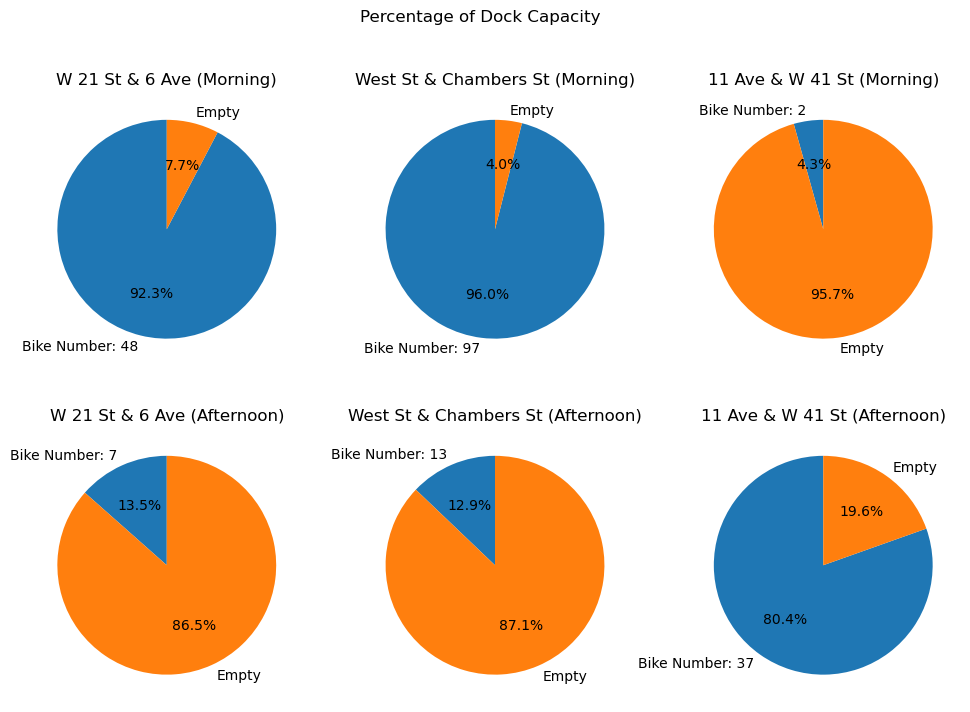

In [45]:
dock_labels = ['W 21 St & 6 Ave', 'West St & Chambers St', '11 Ave & W 41 St']
dock_counts = [w21St6ave_dock, westStChambersSt_dock, station_11aveW41St_dock]
morning_exp = [EM_w21St6ave_dock, EM_westStChambersSt_dock, EM_station_11aveW41St_dock]
afternoon_exp = [EA_w21St6ave_dock, EA_westStChambersSt_dock, EA_station_11aveW41St_dock]
time_labels = ['Morning', 'Afternoon']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Percentage of Dock Capacity')

for i in range(3):
    axs[0, i].pie([morning_exp[i], dock_counts[i] - morning_exp[i]], labels=[f'Bike Number: {morning_exp[i]}', 'Empty'],
                  autopct='%1.1f%%', startangle=90)
    axs[0, i].set_title(f'{dock_labels[i]} ({time_labels[0]})')

    axs[1, i].pie([afternoon_exp[i], dock_counts[i] - afternoon_exp[i]], labels=[f'Bike Number: {afternoon_exp[i]}', 'Empty'],
                  autopct='%1.1f%%', startangle=90)
    axs[1, i].set_title(f'{dock_labels[i]} ({time_labels[1]})')


plt.show()
